# Análisis de Reservas de Hotel
## Introducción
Este proyecto tiene como objetivo realizar un análisis exhaustivo de un conjunto de datos de reservas de hotel. El análisis incluirá la exploración de datos (EDA), un análisis de negocio centrado en el impacto de las cancelaciones en los ingresos, y el entrenamiento y evaluación de modelos de clasificación para predecir el estado de las reservas.

## Diccionario de Datos
Los datos utilizados en este análisis provienen de Kaggle. A continuación, se detalla la fuente y una breve descripción de las columnas:


| Columna | Descripción | Tipo de Variable |
|---|---|---|
| `Booking_ID` | Identificador único de la reserva. | Numérica |
| `no_of_adults` | Número de adultos en la reserva. | Numérica Discreta |
| `no_of_children` | Número de niños en la reserva. | Numérica Discreta |
| `no_of_weekend_nights` | Número de noches de fin de semana reservadas. | Numérica Discreta |
| `no_of_week_nights` | Número de noches de entre semana reservadas. | Numérica Discreta |
| `type_of_meal_plan` | Tipo de plan de comidas. | Categórica |
| `required_car_parking_space` | Indica si se requiere espacio de estacionamiento. | Categórica Binaria |
| `room_type_reserved` | Tipo de habitación reservada. | Categórica |
| `lead_time` | Número de días entre la fecha de reserva y la fecha de llegada. | Numérica Discreta |
| `arrival_year` | Año de llegada. | Temporal |
| `arrival_month` | Mes de llegada. | Temporal |
| `arrival_date` | Día de llegada. | Temporal |
| `market_segment_type` | Tipo de segmento de mercado (ej. Online, Offline, etc.). | Categórica |
| `repeated_guest` | Indica si el huésped es recurrente. | Categórica Binaria |
| `no_of_previous_cancellations` | Número de cancelaciones previas del huésped. | Numérica Discreta |
| `no_of_previous_bookings_not_canceled` | Número de reservas previas no canceladas por el huésped. | Numérica Discreta |
| `avg_price_per_room` | Precio promedio por habitación por noche. | Numérica Continua |
| `no_of_special_requests` | Número de solicitudes especiales realizadas por el huésped. | Numérica Discreta |
| `booking_status` | Estado de la reserva. | Categórica Binaria |

- **Fuente de los datos**: [Hotel Reservations Classification Dataset](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset?resource=download)

# EDA

## Variables numéricas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv('data/Hotel Reservations.csv')


Primeras 5 filas del dataset:
  Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10  

In [ ]:
# Seleccionar solo las columnas numéricas, excluyendo variables temporales
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
temporal_cols = ['arrival_year', 'arrival_month', 'arrival_date']
numerical_cols = [col for col in numerical_cols if col not in temporal_cols]
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Excluir 'Booking_ID' si es numérica pero no relevante para estadísticas descriptivas
if 'Booking_ID' in numerical_cols:
    numerical_cols.remove('Booking_ID')

print("\nEstadísticas descriptivas de las variables numéricas:")
print(df[numerical_cols].describe())


Estadísticas descriptivas de las variables numéricas (sin variables temporales):
       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  36275.000000    36275.000000          36275.000000       36275.000000   
mean       1.844962        0.105279              0.810724           2.204300   
std        0.518715        0.402648              0.870644           1.410905   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max        4.000000       10.000000              7.000000          17.000000   

       required_car_parking_space     lead_time  repeated_guest  \
count                36275.000000  36275.000000    36275.000000   
mean                     0.030986     85.232557        0.025637

## Distribuciones

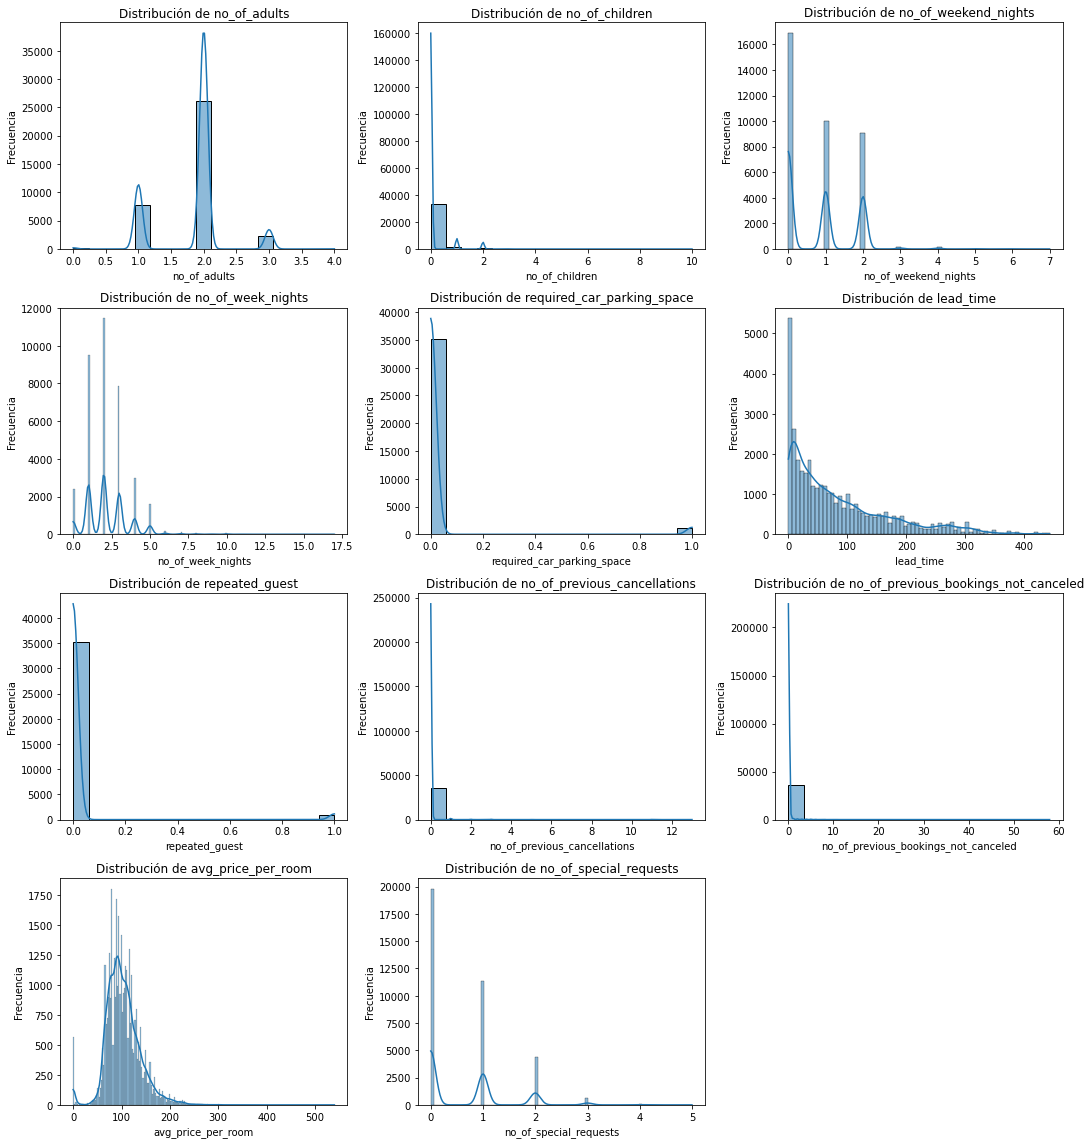

In [15]:
# Visualizar distribuciones de variables numéricas
import math

num_vars = len(numerical_cols)
n_cols = 3
n_rows = math.ceil(num_vars / n_cols)

plt.figure(figsize=(5 * n_cols, 4 * n_rows))
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

## Tabla de correlaciones


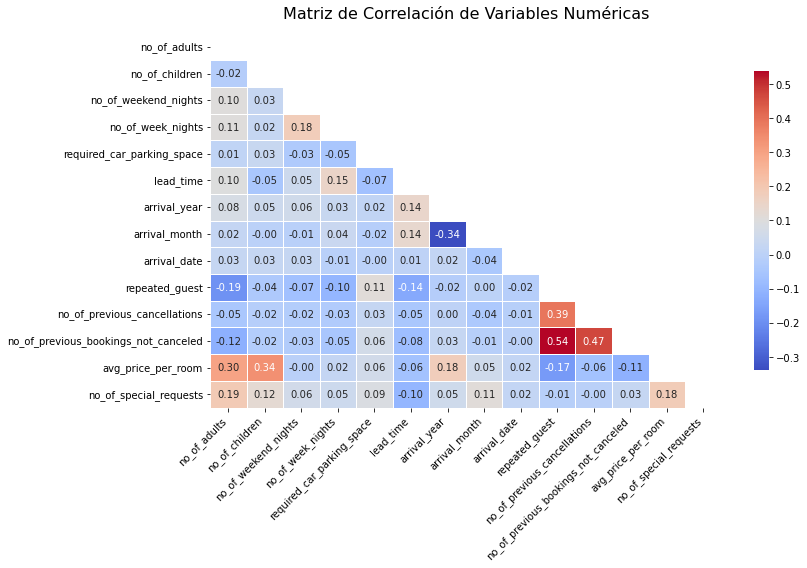

In [8]:
# Calcular la matriz de correlación
correlation_matrix = df[numerical_cols].corr()

# Generar una máscara para la mitad superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=16, pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### Correlaciones mas importantes

In [13]:
# Mostrar la tabla de las 10 correlaciones más importantes con correlación y valor absoluto
top_10_corr_full = top_10_corr.copy()
top_10_corr_full['Correlación'] = [
    correlation_matrix.loc[row['Variable 1'], row['Variable 2']]
    for _, row in top_10_corr.iterrows()
]
cols = ['Variable 1', 'Variable 2', 'Correlación', 'Correlación Absoluta']
top_10_corr_full = top_10_corr_full[cols]
top_10_corr_full = top_10_corr_full.sort_values(by='Correlación Absoluta', ascending=False).reset_index(drop=True)
display(top_10_corr_full)

,Variable 1,Variable 2,Correlación,Correlación Absoluta
0,no_of_previous_bookings_not_canceled,repeated_guest,0.539156,0.539156
1,no_of_previous_bookings_not_canceled,no_of_previous_cancellations,0.468147,0.468147
2,repeated_guest,no_of_previous_cancellations,0.390810,0.390810
3,arrival_month,arrival_year,-0.339689,0.339689
4,no_of_children,avg_price_per_room,0.337728,0.337728
5,avg_price_per_room,no_of_adults,0.296886,0.296886
6,repeated_guest,no_of_adults,-0.192277,0.192277
7,no_of_adults,no_of_special_requests,0.189401,0.189401
8,avg_price_per_room,no_of_special_requests,0.184381,0.184381
9,no_of_weekend_nights,no_of_week_nights,0.179577,0.179577


### Observaciones

## Variables categóricas